In [12]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('D:/datasetGold.csv')
df.index.freq = 'D'


In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<AxesSubplot:>

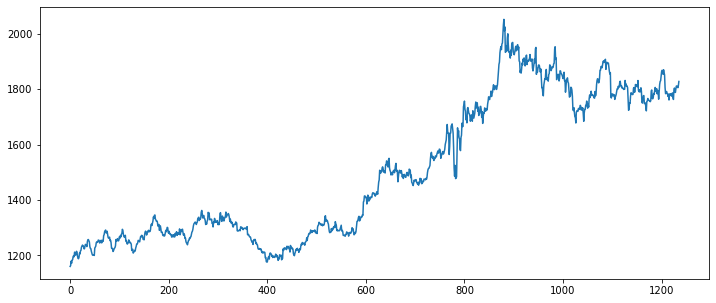

In [14]:
df['Close'].plot(figsize=(12,5))

In [15]:
stepwise_fit = auto_arima(df['Close'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10179.324, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10175.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10177.773, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10177.776, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10175.544, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10179.722, Time=0.74 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.364 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5086.772
Date:                Tue, 03 Jan 2023   AIC                          10175.544
Time:                        22:48:24   BIC                          10180.663
Sample:                             0   HQIC                         10177.470
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       221.3659      4.012     55.169      0.000     213.502     229.230
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              3317.99
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.92   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
auto_arima(df['Close'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5086.772
Date:                Tue, 03 Jan 2023   AIC                          10175.544
Time:                        22:48:26   BIC                          10180.663
Sample:                             0   HQIC                         10177.470
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       221.3659      4.012     55.169      0.000     213.502     229.230
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              3317.99
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.92   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Close[:round(len(df)*0.9)]
test = df.Close[round(len(df)*0.9):]

In [18]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1112
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4575.100
Date:                Tue, 03 Jan 2023   AIC                           9152.201
Time:                        22:48:28   BIC                           9157.214
Sample:                             0   HQIC                          9154.096
                               - 1112                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       220.9937      4.064     54.375      0.000     213.028     228.960
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              3606.88
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               6.67   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

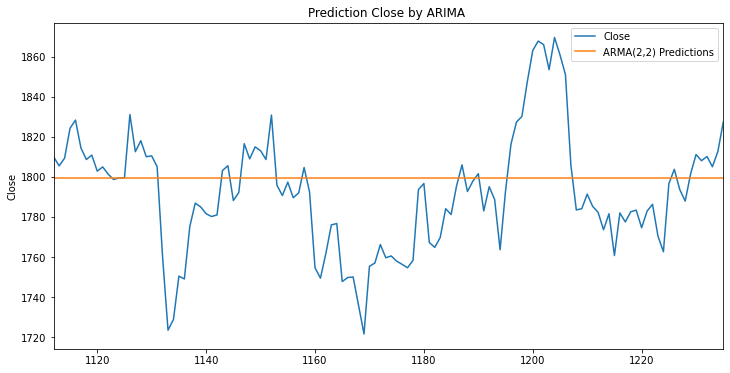

In [20]:
title = 'Prediction Close by ARIMA '
ylabel='Close'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ARIMAmodel = ARIMA(train, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(y_pred_df["Predictions"], test))
print("RMSE: ",arma_rmse)
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape = mean_absolute_percentage_error(y_pred_df["Predictions"], test)
print("MAPE: ", mape * 100)

RMSE:  30.198529925766554
MAPE:  1.288772056872852
